#  Загрузка предобученных эмбеддингов

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://rusvectores.org/
* https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
* https://github.com/natasha/navec
* https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html

## Задачи для совместного разбора

1\. Создайте объект `nn.Embedding` на основе файла `ruscorpora_upos_skipgram_300_5_2018_sample.vec`.

In [ ]:
import torch as th

In [ ]:
embeddings = []
words = []
with open("/content/ruscorpora_upos_skipgram_300_5_2018_sample.vec") as fp:
  fp.readline()
  for line in fp:
    word_pos, vector = line.split(" ", maxsplit=1)
    word, pos = line.split("_")
    embedding = [float(n) for n in vector.split()]
    embeddings.append(embedding)
    words.append(word)

embeddings = th.tensor(embeddings)
embeddings.shape

torch.Size([4, 300])

In [ ]:
embeddings

tensor([[-0.0312,  0.0243, -0.0314,  ..., -0.0880,  0.0217, -0.0011],
        [-0.0091,  0.0305,  0.0016,  ..., -0.0671,  0.0900,  0.0647],
        [ 0.0092,  0.0413,  0.0039,  ..., -0.0028,  0.0904,  0.0656],
        [-0.0611,  0.0601,  0.0791,  ..., -0.0239,  0.0646,  0.0744]])

In [ ]:
words

['мочь', 'год', 'xx', 'человек']

In [ ]:
text = "человек год"
tokens = text.split() # препроцессинг + токенизация
token_idx = [words.index(t) for t in tokens]
token_idx

[3, 1]

In [ ]:
token_embeddings = embeddings[token_idx] # 2 x 300

In [ ]:
sent_embedding = token_embeddings.mean(dim=0)  # внимание !! dim=0 !!
sent_embedding.shape

torch.Size([300])

In [ ]:
import torch.nn as nn

emb_layer = nn.Embedding(num_embeddings=4, embedding_dim=200) # это инициализируется случайным образом
emb_layer

Embedding(4, 200)

In [ ]:
token_idx_l = th.tensor(token_idx).long()
emb_layer(token_idx_l).shape

torch.Size([2, 200])

In [ ]:
layer = nn.Embedding.from_pretrained(embeddings) # это на основе уже обученных эмбеддингов
layer(token_idx_l).shape

torch.Size([2, 300])

## Задачи для самостоятельного решения

### 1.

<p class="task" id="1"></p>

1\. Воспользовавшись предобученными эмбеддингами [ruscorpora_upos_skipgram_300_5_2018](https://rusvectores.org/static/models/rusvectores4/RNC/ruscorpora_upos_skipgram_300_5_2018.vec.gz), создайте словарь, где ключом является кортеж из слова и части речи, а значением - номер этого слова в файле эмбеддингами (первую строку при расчете номера строк не учитывайте). Выведите на экран количество элементов в словаре. Создайте двумерный массив эмбеддингов и выведите на экран его форму.

- [ ] Проверено на семинаре

In [ ]:
word_d = {}

In [ ]:
import gzip

In [ ]:
embeddings = []
words = []
with gzip.open("/content/ruscorpora_upos_skipgram_300_5_2018.vec.gz", 'rt', 'utf-8') as fp:
  fp.readline()
  for idx, line in enumerate(fp):
    word_pos, vector = line.split(" ", maxsplit=1)
    word, pos = word_pos.split("_", maxsplit=1)
    embedding = [float(n) for n in vector.split()]
    embeddings.append(embedding)
    words.append(word)
    word_d[(word, pos)] = idx

In [ ]:
len(word_d)

195071

In [ ]:
word_d

{('мочь', 'VERB'): 0,
 ('год', 'NOUN'): 1,
 ('xx', 'NUM'): 2,
 ('человек', 'NOUN'): 3,
 ('сказать', 'VERB'): 4,
 ('говорить', 'VERB'): 5,
 ('время', 'NOUN'): 6,
 ('xxxx', 'NUM'): 7,
 ('знать', 'VERB'): 8,
 ('самый', 'ADJ'): 9,
 ('дело', 'NOUN'): 10,
 ('делать', 'VERB'): 11,
 ('день', 'NOUN'): 12,
 ('жизнь', 'NOUN'): 13,
 ('видеть', 'VERB'): 14,
 ('рука', 'NOUN'): 15,
 ('очень', 'ADV'): 16,
 ('первый', 'ADJ'): 17,
 ('новый', 'ADJ'): 18,
 ('давать', 'VERB'): 19,
 ('становиться', 'VERB'): 20,
 ('слово', 'NOUN'): 21,
 ('должен', 'ADJ'): 22,
 ('иметь', 'VERB'): 23,
 ('идти', 'VERB'): 24,
 ('xxx', 'NUM'): 25,
 ('большой', 'ADJ'): 26,
 ('глаз', 'NOUN'): 27,
 ('лицо', 'NOUN'): 28,
 ('хотеть', 'VERB'): 29,
 ('место', 'NOUN'): 30,
 ('понимать', 'VERB'): 31,
 ('смотреть', 'VERB'): 32,
 ('каждый', 'ADJ'): 33,
 ('работа', 'NOUN'): 34,
 ('казаться', 'VERB'): 35,
 ('писать', 'VERB'): 36,
 ('голова', 'NOUN'): 37,
 ('оставаться', 'VERB'): 38,
 ('сторона', 'NOUN'): 39,
 ('друг', 'NOUN'): 40,
 ('спрашива

In [ ]:
import torch as th

In [ ]:
embed = th.tensor(embeddings)
embed

tensor([[-0.0312,  0.0243, -0.0314,  ..., -0.0880,  0.0217, -0.0011],
        [-0.0091,  0.0305,  0.0016,  ..., -0.0671,  0.0900,  0.0647],
        [ 0.0092,  0.0413,  0.0039,  ..., -0.0028,  0.0904,  0.0656],
        ...,
        [ 0.0543, -0.0093,  0.0410,  ..., -0.0346,  0.0936,  0.0852],
        [-0.0001,  0.0731,  0.0426,  ..., -0.0082,  0.0823,  0.0885],
        [ 0.0404,  0.0556,  0.0693,  ..., -0.0507,  0.1030,  0.0159]])

In [ ]:
embed.shape

torch.Size([195071, 300])

### 2.

<p class="task" id="2"></p>

2\. Используя PCA, уменьшите размерность загруженных эмбеддингов до 2. Визуализируйте на плоскости точки для слов "кот", "кошка", "собака", "киса", "овчарка", "студент", "препод". Добавьте для точек подписи.

- [ ] Проверено на семинаре

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
embed_2d = pca.fit_transform(embed.numpy())

In [ ]:
embed_2d.shape

(195071, 2)

In [ ]:
words_ = ["кот", "кошка", "собака", "киса", "овчарка", "студент", "препод"]
words_pos = [key for key in word_d.keys() if key[0] in words_]

words_pos

[('собака', 'NOUN'),
 ('студент', 'NOUN'),
 ('кошка', 'NOUN'),
 ('кот', 'NOUN'),
 ('овчарка', 'NOUN'),
 ('кот', 'PROPN'),
 ('собака', 'PROPN'),
 ('киса', 'PROPN'),
 ('студент', 'PROPN'),
 ('кошка', 'PROPN'),
 ('собака', 'ADV'),
 ('киса', 'NOUN'),
 ('препод', 'NOUN'),
 ('кошка', 'ADV')]

In [ ]:
word_d[('собака', 'NOUN')]

606

In [ ]:
inds = [word_d[word_pos] for word_pos in words_pos]
embeds_2d = embed_2d[inds]

In [ ]:
embeds_2d

array([[-0.20911859, -0.11548087],
       [ 0.05370233,  0.11970372],
       [-0.20471162, -0.17223915],
       [-0.26909298, -0.10094057],
       [-0.11946648, -0.1495039 ],
       [-0.20879526, -0.02676031],
       [-0.20593652,  0.01696619],
       [-0.244727  , -0.03231398],
       [-0.08544094,  0.03419867],
       [-0.1991717 , -0.1056444 ],
       [-0.18225732, -0.12869796],
       [-0.32143247, -0.01070398],
       [-0.01920817,  0.14545956],
       [-0.31544274, -0.12672812]], dtype=float32)

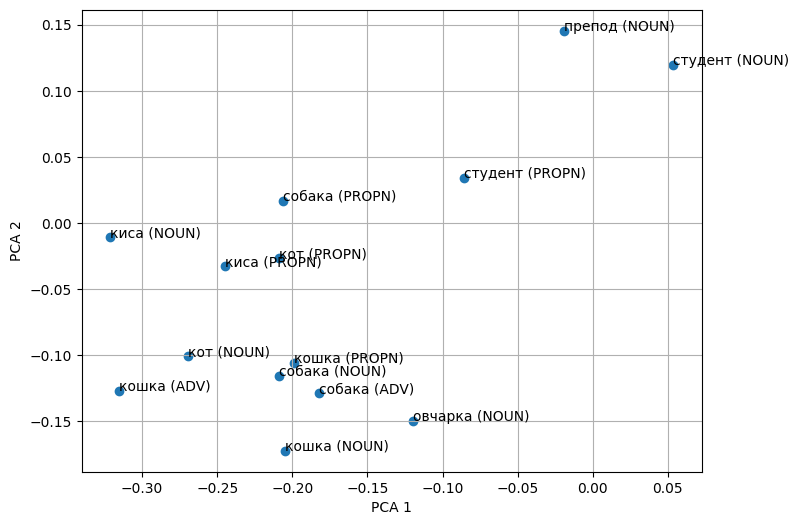

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(embeds_2d[:, 0], embeds_2d[:, 1]) # 1 & 2 stolb

for (word, pos), (x, y) in zip(words_pos, embeds_2d):
    plt.text(x, y, word+' ('+pos+')')

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid()
plt.show()

### 3

<p class="task" id="3"></p>

3\. Напишите функцию, которая для заданного слова `word` находит `k` ближайших других слов в смысле евклидова расстояния между эмбеддингами. Продемонстрируйте работу функции на словах из предыдущего задания, выведя по 5 ближайших слов для каждого из них.

- [ ] Проверено на семинаре

In [ ]:
from scipy.spatial.distance import cdist

In [ ]:
def find_nearest(word, k=5):
  word_pos_ = [key for key in word_d.keys() if key[0] == word]

  if not word_pos_:
    print(f'слова {word} нет в эмбеддингах')
    return []

  word_pos = word_pos_[0] # первое найденное слово с его частью речи
  word_idx = word_d[word_pos]
  word_embed = embed[word_idx].numpy().reshape(1,-1) # vec слова -> (1,300)

  dists = cdist(word_embed, embed.numpy(), metric='euclidean').flatten() # счит евкл расст со всеми др словами
  nearest_idxs = np.argsort(dists)[1:k+1] # само слово пропускаем
  nearest_words = [list(word_d.keys())[i] for i in nearest_idxs]

  return nearest_words

In [ ]:
import numpy as np

In [ ]:
for w in words_:
  near_words = find_nearest(w, k=5)
  print(f"\nближайшие слова для слова '{w}':")
  i=1
  for w, pos in near_words:
    print(f" {i}. {w} ({pos})")
    i+=1


ближайшие слова для слова 'кот':
 1. кошка (NOUN)
 2. котенок (NOUN)
 3. рыбалкин (PROPN)
 4. кота (NOUN)
 5. клеточка (PROPN)

ближайшие слова для слова 'кошка':
 1. кот (NOUN)
 2. собака (NOUN)
 3. котенок (NOUN)
 4. мяукать (VERB)
 5. мяукать (NOUN)

ближайшие слова для слова 'собака':
 1. пес (NOUN)
 2. кошка (NOUN)
 3. овчарка (NOUN)
 4. собачка (NOUN)
 5. собачонка (NOUN)

ближайшие слова для слова 'киса':
 1. оборин (ADJ)
 2. кабюс (PROPN)
 3. памухин (PROPN)
 4. худоля (PROPN)
 5. настюх (PROPN)

ближайшие слова для слова 'овчарка':
 1. пес (NOUN)
 2. собака (NOUN)
 3. дворняга (NOUN)
 4. волкодав (NOUN)
 5. дог (NOUN)

ближайшие слова для слова 'студент':
 1. аспирант (NOUN)
 2. преподаватель (NOUN)
 3. студентка (NOUN)
 4. заочник (NOUN)
 5. университет (NOUN)

ближайшие слова для слова 'препод':
 1. иняз (NOUN)
 2. дубенко (PROPN)
 3. преподаватель (PROPN)
 4. иврит (VERB)
 5. политграмота (NOUN)


### 4.

<p class="task" id="4"></p>

4\. Создайте слой `nn.Embedding` на основе загруженных эмбеддингов. Для каждого слова из задания 2 найдите соответствующий ему индекс. Используя найденные индексы, получите для каждого слова его векторное представление. Выведите форму полученного тензора.

- [ ] Проверено на семинаре

In [ ]:
len(words_)

7

In [ ]:
embed.shape

torch.Size([195071, 300])

In [ ]:
import torch.nn as nn

In [ ]:
embed_layer = nn.Embedding.from_pretrained(embed)

In [ ]:
words_pos

[('собака', 'NOUN'),
 ('студент', 'NOUN'),
 ('кошка', 'NOUN'),
 ('кот', 'NOUN'),
 ('овчарка', 'NOUN'),
 ('кот', 'PROPN'),
 ('собака', 'PROPN'),
 ('киса', 'PROPN'),
 ('студент', 'PROPN'),
 ('кошка', 'PROPN'),
 ('собака', 'ADV'),
 ('киса', 'NOUN'),
 ('препод', 'NOUN'),
 ('кошка', 'ADV')]

In [ ]:
import torch

In [ ]:
words_idx = torch.tensor([word_d[word_pos] for word_pos in words_pos])

In [ ]:
words_embeds = embed_layer(words_idx)
words_embeds.shape

torch.Size([14, 300])

### 5.

<p class="task" id="5"></p>

5\. Создайте новый вариант `nn.Embedding`, расширив матрицу эмббедингов таким образом, чтобы для нулевого индекса возвращается тензор из нулей, а для первого индекса возвращается тензор из чисел $\frac{1}{300}$. Выведите на экран размер, количество эмбеддингов и эмбеддинги для индексов 0 и 1.

- [ ] Проверено на семинаре

In [ ]:
embed.shape

torch.Size([195071, 300])

In [ ]:
1/300

0.0033333333333333335

In [ ]:
zero_vec = torch.zeros(1, embed.shape[1])

In [ ]:
one_vec = torch.full((1, embed.shape[1]), 1/300)

In [ ]:
new_embed = torch.cat([zero_vec, one_vec, embed], dim=0)

In [ ]:
new_embed

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0033,  0.0033,  0.0033,  ...,  0.0033,  0.0033,  0.0033],
        [-0.0312,  0.0243, -0.0314,  ..., -0.0880,  0.0217, -0.0011],
        ...,
        [ 0.0543, -0.0093,  0.0410,  ..., -0.0346,  0.0936,  0.0852],
        [-0.0001,  0.0731,  0.0426,  ..., -0.0082,  0.0823,  0.0885],
        [ 0.0404,  0.0556,  0.0693,  ..., -0.0507,  0.1030,  0.0159]])

In [ ]:
new_layer = nn.Embedding.from_pretrained(new_embed)

In [ ]:
new_embed.shape

torch.Size([195073, 300])

In [ ]:
new_embed.shape[0]

195073

In [ ]:
new_layer(torch.tensor(0))

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [ ]:
new_layer(torch.tensor(1))

tensor([0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
        0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
        0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
        0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
        0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
        0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
        0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
        0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
        0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
        0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
        0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
        0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
        0.0033, 0.0033, 0.0033, 0.0033, 

### 6.

<p class="task" id="6"></p>

6\. Для каждого слова в каждом предложении батча получите его индекс. При поиске индекса слова приводите слово к нормальной форме. Части речи для простоты можно не учитывать. В случае отсутствия слова в словаре используйте индекс 1. Дополните все наборы индексов до одного размера индексом 0. Используя найденные индексы, получите для каждого слова в каждом предложении его векторное представление. Выведите форму полученного тензора.

Получите векторное представление каждого предложения путем усреднения эмбеддингов слов этого предложения. Выведите форму результата на экран.

- [ ] Проверено на семинаре

In [ ]:
sents = [
    "робот пылесос только что опередил меня и сожрал попкорнину которую я хотел поднять",
    "я приходил к хирургу он мне предложил отрезать ухо"
]

In [ ]:
!pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 27.3 MB/s eta 0:00:00


In [ ]:
import pymorphy3

morph = pymorphy3.MorphAnalyzer()

sents_idx = []
for sent in sents:
  words = sent.lower().split() # ток-ия
  words_norm = [morph.parse(w)[0].normal_form for w in words] # лемма-ция
  words_idx = [word_d.get((w, 'NOUN'), 1) for w in words_norm]  # если нет в словаре - 1
  sents_idx.append(th.tensor(words_idx))

sents_idx[0].shape, sents_idx[1].shape

(torch.Size([13]), torch.Size([9]))

In [ ]:
from torch.nn.utils.rnn import pad_sequence

sents_pad_idx = pad_sequence(sents_idx, batch_first=True, padding_value=0)

sents_pad_idx

tensor([[  8121,  18358,      1,      1,      1,  77780,      1, 161855,      1,
              1,  77780,  19836,  41616],
        [ 77780,  40357,      1,   5941,      1,  77780, 192321,  56225,    584,
              0,      0,      0,      0]])

In [ ]:
sents_pad_idx[0].shape, sents_pad_idx[1].shape

(torch.Size([13]), torch.Size([13]))

In [ ]:
words_embeds = new_layer(sents_pad_idx)
words_embeds

tensor([[[ 0.0509, -0.0621,  0.0309,  ...,  0.0714,  0.1030,  0.0879],
         [-0.0204,  0.0529,  0.0057,  ..., -0.0069,  0.0785,  0.0230],
         [ 0.0033,  0.0033,  0.0033,  ...,  0.0033,  0.0033,  0.0033],
         ...,
         [ 0.0551, -0.0024, -0.0474,  ...,  0.1245,  0.1254, -0.0545],
         [-0.0175,  0.0234, -0.0184,  ...,  0.0377,  0.0716,  0.0817],
         [ 0.0097,  0.1000,  0.0984,  ..., -0.0198,  0.0341,  0.0622]],

        [[ 0.0551, -0.0024, -0.0474,  ...,  0.1245,  0.1254, -0.0545],
         [-0.0883,  0.1077, -0.0111,  ..., -0.0928,  0.1086,  0.0675],
         [ 0.0033,  0.0033,  0.0033,  ...,  0.0033,  0.0033,  0.0033],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]])

In [ ]:
words_embeds.shape

torch.Size([2, 13, 300])

In [ ]:
sents_embeds = words_embeds.mean(dim=0)
sents_embeds.shape

torch.Size([13, 300])

### 7.

<p class="task" id="7"></p>

7\. Загрузите модель [navec_hudlit_v1_12B_500K_300d_100q.tar](https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar) с помощью пакета `navec`. Для каждого слова в каждом предложении батча получите его индекс. При поиске индекса слова приводите слово к нормальной форме. В случае отсутствия слова в словаре используйте индекс токена `<unk>`. Дополните все наборы индексов до одного размера индексом токена `<pad>`. Используя найденные индексы, получите для каждого слова в каждом предложении его векторное представление.  Выведите форму полученного тензора.

- [ ] Проверено на семинаре

In [ ]:
sents = [
    "робот пылесос только что опередил меня и сожрал попкорнину которую я хотел поднять",
    "я приходил к хирургу он мне предложил отрезать ухо"
]

In [ ]:
!pip install navec

In [ ]:
from navec import Navec

!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar -O navec.tar
!mkdir -p navec && tar -xf navec.tar -C navec

--2025-03-14 13:36:15--  https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53012480 (51M) [application/x-tar]
Saving to: ‘navec.tar’

navec.tar           100%[===================>]  50.56M  17.0MB/s    in 3.0s    

2025-03-14 13:36:19 (17.0 MB/s) - ‘navec.tar’ saved [53012480/53012480]



In [ ]:
navec = Navec.load("navec/navec_hudlit_v1_12B_500K_300d_100q")

FileNotFoundError: [Errno 2] No such file or directory: 'navec/navec_hudlit_v1_12B_500K_300d_100q'

In [ ]:
navec = Navec.load("navec")

IsADirectoryError: [Errno 21] Is a directory: 'navec'

In [ ]:
navec = Navec.load("navec/pq.bin")

ReadError: file could not be opened successfully:
- method gz: ReadError('not a gzip file')
- method bz2: ReadError('not a bzip2 file')
- method xz: ReadError('not an lzma file')
- method tar: ReadError('invalid header')

In [ ]:
navec = Navec.load("navec/vocab.bin")

ReadError: file could not be opened successfully:
- method gz: ReadError('bad checksum')
- method bz2: ReadError('not a bzip2 file')
- method xz: ReadError('not an lzma file')
- method tar: ReadError('invalid header')

In [ ]:
unk_idx = 0 #navec.vocab["<unk>"]
pad_idx = 1 # navec.vocab["<pad>"]

In [ ]:
sents_idx = []
for sent in sents:
    words = sent.lower().split()
    words_norm = [morph.parse(w)[0].normal_form for w in words]
    words_idx = [navec.vocab.get(w, unk_idx) for w in words_norm]
    sents_idx.append(torch.tensor(words_idx))

NameError: name 'navec' is not defined

In [ ]:
sents_pad = pad_sequence(sents_idx, batch_first=True, padding_value=pad_idx)

In [ ]:
words_embeds = torch.tensor([navec[word] for word in navec.vocab])
embed_layer = torch.nn.Embedding.from_pretrained(words_embeds)

In [ ]:
sents_embeds = embed_layer(sents_pad)
sents_embeds.shape